## **Lab 6**

***Problem***: Robot's Shortest Path in a Maze
- A growing e-commerce company is building a new warehouse, and wants a robot to handle all picking operations. The robot must pick up items and deliver them
to a packaging area for shipping. To maximize efficiency, the robot must learn the shortest path between the packaging area and all other allowed locations in the warehouse.
- The robot must navigate through the shortest path while avoiding all obstacles while taking the penalties into consideration.

***Source***: Ngo, Tracey. 2023. Can Machine Learning Solve a Maze? https://www.sciencebuddies.org/science-fair-projects/project-ideas/ArtificialIntelligence_p008/artificial-intelligence/machine-learning-maze

***Additional References***

These references help with understand how Q-learning is used to train and evaluate an RL agent.

- Awan, Abid Ali. 2022. An Introduction to Q-Learning: A Tutorial For Beginners. https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial
- Lamba, Akshay. 2018. An Introduction to Q-Learning: Reinforcement Learning. Medium. https://medium.com/free-code-camp/an-introduction-to-q-learning-reinforcement-learning-14ac0b4493cc. Also on freeCodeCamp.org at https://www.freecodecamp.org/news/an-introduction-to-q-learning-reinforcement-learning-14ac0b4493cc/
- Salloum, Ziad. 2021. Exploration in Reinforcement Learning. Medium. https://towardsdatascience.com/exploration-in-reinforcement-learning-e59ec7eeaa75
- Singh, Anubhav. 2024. Introduction to Reinforcement Learning. https://www.datacamp.com/tutorial/introduction-reinforcement-learning

#### **Define the `Maze` class**
A simple maze has walls, a starting point (S), and a goal point (G). The maze is represented by a grid where each cell has either 0 or 1 value:
- 0 represents an empty cell
- 1 represents a wall.

To create a maze:
- Choose the size of the maze: number of rows (or height) and number of columns (or width)
- Locate the start and goal positions inside the maze.




- To represent a 2-dimensional grid, we use Python library `numpy`.
- To visualize the grid, we use `matplotlib.pyplot` module.

Next, we import these libraries (code cell **1**) and define the `Maze` class (code cell **2**)

**1** (code cell)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**2** (code cell)

In [ ]:
class Maze:
    """Represents a maze environment."""
    def __init__(self, maze, start_position, goal_position):
        """
        Create Maze object given maze configuration in the parameters and with
        start and goal positions.

        Instance Variables:
        :self.maze: numpy ndarray, Represents the layout of the maze.
        :self.maze_height: int, Represents the height of the maze
          (number of rows).
        :self.maze_width: int, Represents the width of the maze
          (number of columns).
        :self.start_position: tuple, Represents the starting position
          (row, column) in the maze.
        :self.goal_position: tuple, Represents the goal position (row, column)
          in the maze.

        Parameters:
        :param maze: numpy ndarray, Represents the layout of the maze where 0
          represents a clear path and 1 represents a wall.
        :param start_position: tuple, Represents the starting position
          (row, column) in the maze.
        :param goal_position: tuple, Represents the goal position (row, column)
          in the maze.
        """
        self.maze = maze
        self.maze_height = maze.shape[0]
        self.maze_width = maze.shape[1]
        self.start_position = start_position
        self.goal_position = goal_position

    def show_maze(self, path=None):
        """
        Displays the maze with start and goal positions marked.

        :param path: list of tuples, Represents the path taken by the agent.
        """
        plt.figure(figsize=(3,3))
        plt.imshow(self.maze, cmap='Blues')
        plt.text(self.start_position[0], self.start_position[1], 'S',
                  ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G',
                  ha='center', va='center', color='green', fontsize=20)
        if path:
            for position in path:
                plt.text(position[0]-0.1, position[1], "o", va='center',
                         color='black', fontsize=15)
        for i in range(self.maze.shape[0] + 1):
            plt.axhline(i - 0.5, color='black', linewidth=0.5)
        for j in range(self.maze.shape[1] + 1):
            plt.axvline(j - 0.5, color='black', linewidth=0.5)
        plt.xticks([]), plt.yticks([])
        plt.grid(color='black', linewidth=2)
        plt.show()

#### **Create a `Maze` instance**

1. Define a maze layout by instantiating a **5 x 5 `numpy` array**, with empty and wall cells
2. Create a `Maze` object
  - Using the maze layout and
  - Determining the start (0, 0) and end positions (4, 4)
3. Visualize the maze

**3** (code cell)

In [ ]:
maze_layout = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

maze = Maze(maze_layout, (0, 0), (4, 4))
maze.show_maze()

#### **Robot Actions**

The robot can take the following actions, each represented as a tuple of two values: (row change, column change)

- **North:** Moving one step up, reducing the row index by 1, (-1, 0)
- **South:** Moving one step down, increasing the row index by 1, (1, 0)
- **West:** Moving one step to the left, reducing the column index by 1, (0, -1)
- **East:** Moving one step to the right, increasing the column index by 1, (0, 1)


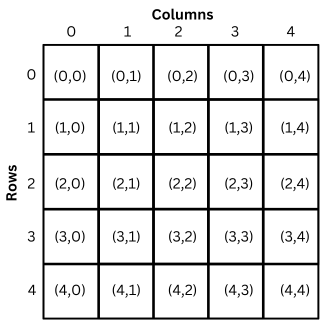

#### **Implement and evaluate the agent (robot)**

**What the agent does**

See code cells **4** and **5**
- The agent can move in four directions: North, South, West, and East (see code cell **4**)
  - Define **`actions` list** of 4 tuples for the 4 directions
  - A tuple has (row, column) values that change the current position to the new position in the desired direction
- The agent uses **$\epsilon$-greedy strategy** (see code cell **5**, `get_action()` method) by balancing:
  - **exploration**: choose a random action
  - **exploitation**:
    - choose the best action for the current state according to the Q-table, and
    - update the Q-table

**How the agent finds the shortest path**

See the code cells **6**, **7**, **8**, **9**

**How the agent learns**

See the code cells **10**, **11**, and **12**


**4** (code cell)

In [ ]:
actions = [(-1, 0),
          (1, 0),
          (0, -1),
          (0, 1)]

#### **Define the `QLearningAgent` class**

The `QLearningAgent` class implements an agent that learns how to find the shortest path to the goal by using the **$\epsilon$-greedy stragegy**.

**5** (code cell)

In [ ]:
class QLearningAgent:
    """Represents a Q-learning agent for navigating a maze environment."""
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9,
                 exploration_start=1.0, exploration_end=0.01,
                 num_episodes=100):
        """
        Instance Variables:
        :self.q_table: numpy ndarray, to store Q-values
        :self.learning_rate: float, Learning rate
        :self.discount_factor: float, Discount factor for future rewards
        :self.exploration_start: float, Initial exploration rate
        :self.exploration_end: float, Final exploration rate
        :self.num_episodes: int, Number of episodes for training

        Parameters:
        :param maze: Maze
        :param learning_rate: float, Learning rate
        :param discount_factor: float, Discount factor for future rewards
        :param exploration_start: float, Initial exploration rate
        :param exploration_end: float, Final exploration rate
        :param num_episodes: int, Number of episodes for training
        """
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, len(actions)))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_start = exploration_start
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        """
        Calculates the exploration rate for the current episode.

        :param current_episode: int, Current episode number.
        :return: float, Exploration rate for the current episode
        """
        exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode):
        """
        Selects an action for the given state using epsilon-greedy strategy.

        :param state: tuple, Current state (row, column) in the maze
        :param current_episode: int, Current episode number
        :return: int, index of the selected action (0 for North, 1 for South, 2
          for West, 3 for East).
        """
        exploration_rate = self.get_exploration_rate(current_episode)
        if np.random.rand() < exploration_rate:
            return np.random.randint(len(actions))
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, next_state, reward):
        """
        Updates the Q-table based on the Q-learning algorithm.

        :param state: tuple, Current state (row, column) in the maze.
        :param action: int, Index of the action taken.
        :param next_state: tuple, Next state (row, column) in the maze.
        :param reward: float, Reward received for the action.
        """
        best_next_action = np.argmax(self.q_table[next_state])
        current_q_value = self.q_table[state][action]
        max_future_reward = self.q_table[next_state][best_next_action]
        # We use `e_d_c_r` to mean expected discounted cumulative reward
        e_d_c_r = self.learning_rate * (reward + self.discount_factor * max_future_reward - current_q_value)
        new_q_value = current_q_value + e_d_c_r
        self.q_table[state][action] = new_q_value

#### **Reward system**
- Gain 100 points when goal is reached
- Lose 10 points when wall or maze edge is hit
- Lose 1 point when a step is taken
  - This helps with finding the shortest path

**6** (code cell)

In [ ]:
goal_reward = 100
wall_edge_penalty = -10
step_penalty = -1

#### **Define `finish_episode()` function**
As long as
- the goal has not been reached OR
- the limit of maximum number of steps has not been reached
  - Ask the agent to `get_action()`
  - Check the condition of the new state obtained from the action
  - Apply corresponding reward (wall/edge penalty, step reward, or goal reward)
  - Decide what to do with the state
    - Change to new state if step can be taken
    - Be stuck in current state if wall or edge
    - Win and finish the episode if goal is reached
  - Update reward and number of steps
  - If training is allowed, update Q-table
Return
- Either total reward, and total number of steps, and the path if successful
- Or 0 reward, total of number of steps, and no path

**7** (code cell)

In [ ]:
def finish_episode(agent, maze, current_episode, train=True):
    """
    Simulates the agent's movements in the maze for a single episode.

    :param agent: QLearningAgent object, Q-learning agent navigating the maze.
    :param maze: Maze object, Maze environment.
    :param current_episode: int, Current episode number.
    :param train: bool, Flag to update (or not) Q-table during training
      (default=True).
    :return: tuple of three values
      - episode_reward: float, Cumulative reward obtained during the episode.
      - episode_step: int, Total number of steps taken during the episode.
      - path: list of states visited during the episode.
    """
    rows, columns = maze_layout.shape
    max_steps = rows * columns
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    while not is_done and episode_step < max_steps:
        action = agent.get_action(current_state, current_episode)

        next_state = (current_state[0] + actions[action][0], current_state[1]
                      + actions[action][1])

        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == 1:
            reward = wall_edge_penalty
            next_state = current_state
        elif next_state == maze.goal_position:
            path.append(current_state)
            reward = goal_reward
            is_done = True
        else:
            path.append(current_state)
            reward = step_penalty

        episode_reward += reward
        episode_step += 1

        if train:
            agent.update_q_table(current_state, action, next_state, reward)

        current_state = next_state

    if next_state != maze.goal_position:
        return 0, episode_step, []

    return episode_reward, episode_step, path


#### **Define `test_agent()` function**

**8** (code cell)

In [ ]:
def test_agent(agent, maze, num_episodes=1):
    """
    Evaluates the agent's performance in the maze.

    :param agent: QLearningAgent, Q-learning agent navigating the maze.
    :param maze: Maze
    :param num_episodes: int, Number of episodes to simulate (default=1).
    :return: tuple of two values, corresponding to:
      - episode_step: int, Total number of steps taken during the evaluation
      episode
      - episode_reward: float, Cumulative reward obtained during the evaluation
      episode
    """
    episode_reward, episode_step, path = finish_episode(agent, maze,
                                                        num_episodes,
                                                        train=False)
    if path == []:
      print("No path found")
    else:
      print("Learned Path:")
      for row, col in path:
          print(f"({row}, {col})-> ", end='')
      print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)

    maze.show_maze(path)

    return episode_step, episode_reward

**9** (code cell)

In [ ]:
agent = QLearningAgent(maze)
test_agent(agent, maze)

Did you notice that the untrained robot takes a lot of steps? That is because the robot keeps backtracking and hitting walls. Before it has learned anything, it is blindly going through the maze, choosing its path randomly.

**10** (code cell)

In [ ]:
def train_agent(agent, maze, num_episodes=100):
    """
    Trains the Q-learning agent to navigate the maze.

    :param agent: QLearningAgent, agent navigating the maze
    :param maze: Maze
    :param num_episodes: int, Number of episodes for training (default=100)
    """
    episode_rewards = []
    episode_steps = []

    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze,
                                                            episode,
                                                            train=True)

        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)
    if episode_reward == 0:
      print ("No path found")
    else:
      plt.figure(figsize=(10, 5))
      plt.subplot(1, 2, 1)
      plt.plot(episode_rewards)
      plt.xlabel('Episode')
      plt.ylabel('Cumulative Reward')
      plt.title('Reward per Episode')
      print(episode_rewards)
      average_reward = sum(episode_rewards) / len(episode_rewards)
      print(f"The average reward is: {average_reward}")

      plt.subplot(1, 2, 2)
      plt.plot(episode_steps)
      plt.xlabel('Episode')
      plt.ylabel('Steps Taken')
      plt.ylim(0, 100)
      plt.title('Steps per Episode')

      average_steps = sum(episode_steps) / len(episode_steps)
      print(f"The average steps is: {average_steps}")

      plt.tight_layout()
      plt.show()

#### **Training the agent**

**11** (code cell)

In [ ]:
train_agent(agent, maze, num_episodes=100)

#### **Testing the agent after training**

**12** (code cell)

In [ ]:
test_agent(agent, maze, num_episodes=100)